# Assignment 11: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm_notebook

from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold
from xgboost import XGBClassifier
from joblib import dump, load
import swifter

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import drive
drive.mount('/drive')
%cd /drive/My Drive/Appliedai colab/donors choose data/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive
/drive/My Drive/Appliedai colab/donors choose data


In [0]:
# gcp bucket
%cd /demo-mount/donors choose data

/demo-mount/donors choose data


In [0]:
# sample_data = {'State':['A','B','C','A','A','B','A','A','C','C'], 'class':[0,1,1,0,1,1,0,1,1,0]}
# df_sample = pd.DataFrame(sample_data)
# X_sample = df_sample[['State']] #2 square brackets selects single column as a dataframe rather than a series
# y_sample = df_sample[['class']].values

In [0]:
# # alpha is used for laplace smoothing
# feature = 'State'
# alpha = 0
# response_array = response_coding(alpha, feature, X_sample, y_sample)
# response_coded_df = rc_df(response_array, feature)
# response_coded_df

<h1>1. GBDT (xgboost/lightgbm/catboost) </h1>

## 1.1 Loading Data

In [30]:
data = pd.read_csv('preprocessed_final.csv', nrows = 50000)
data = data.drop(['teacher_id','Unnamed: 0','std_price','nrm_price'], axis =1)
data.head()

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,price,quantity
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,Educational Support for English Learners at Home,My students need opportunities to practice beg...,0,0,My students are English learners that are work...,154.60,23
1,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,Wanted: Projector for Hungry Learners,My students need a projector to help with view...,7,1,Our students arrive to our school eager to lea...,299.00,1
2,ms,az,grades_6_8,health_sports,health_wellness_teamsports,Soccer Equipment for AWESOME Middle School Stu...,"My students need shine guards, athletic socks,...",1,0,"\r\n\""True champions aren't always the ones th...",516.85,22
3,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,Techie Kindergarteners,My students need to engage in Reading and Math...,4,1,I work at a unique school filled with both ESL...,232.90,4
4,mrs,tx,grades_prek_2,math_science,mathematics,Interactive Math Tools,My students need hands on practice in mathemat...,1,1,Our second grade classroom next year will be m...,67.98,4


In [0]:
#swifter
#1000 rows - 13.8 secs

In [31]:
%%time
data.merge(data.essay.swifter.apply(lambda s: pd.Series({'neg':sid.polarity_scores(s)['neg'], 
                                                 'neu':sid.polarity_scores(s)['neu'],
                                                 'pos':sid.polarity_scores(s)['pos'],
                                                 'compound':sid.polarity_scores(s)['compound']})), 
           left_index=True, right_index=True)


CPU times: user 10min 24s, sys: 12.5 s, total: 10min 36s
Wall time: 10min 35s


,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,price,quantity,neg,neu,pos,compound
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,Educational Support for English Learners at Home,My students need opportunities to practice beg...,0,0,My students are English learners that are work...,154.60,23,0.008,0.911,0.081,0.9611
1,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,Wanted: Projector for Hungry Learners,My students need a projector to help with view...,7,1,Our students arrive to our school eager to lea...,299.00,1,0.037,0.851,0.112,0.9267
2,ms,az,grades_6_8,health_sports,health_wellness_teamsports,Soccer Equipment for AWESOME Middle School Stu...,"My students need shine guards, athletic socks,...",1,0,"\r\n\""True champions aren't always the ones th...",516.85,22,0.058,0.764,0.179,0.9950
3,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,Techie Kindergarteners,My students need to engage in Reading and Math...,4,1,I work at a unique school filled with both ESL...,232.90,4,0.052,0.733,0.214,0.9931
4,mrs,tx,grades_prek_2,math_science,mathematics,Interactive Math Tools,My students need hands on practice in mathemat...,1,1,Our second grade classroom next year will be m...,67.98,4,0.016,0.897,0.087,0.9192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,mrs,il,grades_prek_2,literacy_language_math_science,literacy_mathematics,iTeach: Using iPads in Instruction,My students need iPads to help customize learn...,8,1,I teach kindergarten in a Title I school in Ch...,539.98,2,0.000,0.890,0.110,0.9473
49996,mr,nv,grades_3_5,health_sports,health_wellness,"A \""Starbucks\"" Classroom Redesign",My students need Hokki Stools to maximize enga...,6,1,The students in our room are enrolled at an el...,214.12,6,0.016,0.800,0.183,0.9872
49997,mrs,sd,grades_3_5,health_sports,health_wellness,Active Bodies = Active Minds,My students need 12 Learniture Active Learning...,9,1,Welcome! My students and I are pleased to have...,52.05,14,0.025,0.733,0.241,0.9952
49998,mrs,ct,grades_prek_2,literacy_language_specialneeds,literature_writing_specialneeds,Can You Read My Writing Now?,"My students need Dimples hand strengthener, th...",37,1,My school empowers 538 students in grades pre-...,102.25,6,0.052,0.789,0.159,0.9819


Create a transformer that'll take all categorical rows, encode them to response_coding, concats the rows and deletes the Original rows.

In [0]:
#https://github.com/Lalit-Yadav-E1483/ml_case_studies/blob/7da02bdef5512c6ab636727a2a589072b0e2d515/cancer_diagnosis/initial_analysis.ipynb
def response_table(alpha, feature, X, y):
    value_count = X[feature].value_counts()
    gv_dict = dict()
    y_series = y

    for i, denominator in value_count.items():
        vec = []
        for k in range(len(np.unique(y))):
            cls_cnt = X.loc[(pd.Series(y.flatten()) == k) & (X[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))
        gv_dict[i]=vec
    return gv_dict, y_series, value_count

def response_coding(alpha, feature, X, y):
    gv_dict, y_series, value_count = response_table(alpha, feature, X, y)

    gv_fea = []
    for index, row in X.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/y_series.unique().size for _ in range(y_series.unique().size)])
    return np.array(gv_fea)

def rc_df(response_array, feature):
  response_coded_df = pd.DataFrame()
  for i in range(response_array.shape[1]):
    name = feature + '_' + str(i)
    response_coded_df[name] = response_array[:,i]
  return response_coded_df

In [0]:
#Custom Transformer that returns passed column as response coding and deletes the original column
from sklearn.base import BaseEstimator, TransformerMixin

class response_coding_transformer( BaseEstimator, TransformerMixin ):
  #Class Constructor
  def __init__( self, feature):
    self._feature = feature

  #Return self nothing else to do here    
  def fit( self, X, y):
    self._temp = pd.DataFrame()
    for feature in self._feature:
      alpha = 0
      response_array = response_coding(alpha, feature, X, y)
      response_coded_df = rc_df(response_array, feature)
      self._temp = pd.concat([self._temp, response_coded_df], axis=1)
    self.new_x = X.drop(self._feature, axis = 1)
    return self.new_x
  
  #Method that describes what we need this transformer to do
  def transform( self, X):
    return pd.concat([self.new_x, self._temp], axis=1)

In [0]:
X = data.drop('project_is_approved', axis =1)
y = data['project_is_approved'].values
categorical_features = ['school_state', 'teacher_prefix', 'project_grade_category','project_subject_categories','project_subject_subcategories']

In [35]:
%%time
rc = response_coding_transformer(categorical_features)
rc.fit(X, y)
X_resp_coded = rc.transform(X)

CPU times: user 3min 28s, sys: 35 ms, total: 3min 28s
Wall time: 3min 28s


In [0]:
# from joblib import dump, load
# dump(X, 'X_encoded_response_coding.pickle')

In [0]:
text_transformer = TfidfVectorizer(stop_words = 'english', min_df = 10)

numeric_features = ['teacher_number_of_previously_posted_projects', 'price']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

text_transformer = Pipeline(steps=[
    ('trans', text_transformer)])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('essay', text_transformer, "essay"),
        ('title', text_transformer, "project_title"),
        ('summary', text_transformer, "project_resource_summary")]
        ,n_jobs=-1, verbose=True, remainder = 'passthrough'
            )

In [37]:
%%time
X_encoded = preprocessor.fit_transform(X_resp_coded)
# X_encoded = load('X_encoded_50000.joblib')

CPU times: user 918 ms, sys: 436 ms, total: 1.35 s
Wall time: 12 s


In [38]:
X_encoded

<50000x18146 sparse matrix of type '<class 'numpy.float64'>'
	with 5943015 stored elements in Compressed Sparse Row format>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, shuffle=True, stratify=y)

**Set 1:** TFIDF + response coding

categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)

**PIPELINE**

In [0]:
# A set of winning parameters

# 'objective': 'binary:logistic',
#           'eval_metric': 'auc',
#           'eta': 0.01,
#           'max_depth': 7,
#           'subsample': 0.8, 
#           'colsample_bytree': 0.4,
#           'min_child_weight': 10,
#           'gamma': 2

In [41]:
%%time 
seed = 42
model = XGBClassifier(objective = 'binary:logistic',
                      random_state = seed, 
                      eval_metric = ["error","auc"])
pipeline = Pipeline(steps=[('classifier',  model)])
pipeline.fit(X_train, y_train);
print("model accuracy score: %.3f" % pipeline.score(X_test, y_test))

model accuracy score: 0.847
CPU times: user 50.6 s, sys: 115 ms, total: 50.7 s
Wall time: 50.8 s


In [43]:
#model assessment
pred_test = pipeline.predict(X_test)
pred_train = pipeline.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test))
print('Classification Report:')
print(classification_report(y_test,pred_test))

Train Accuracy:  0.8490666666666666
Test Accuraccy:  0.84704
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.01      0.03      1929
           1       0.85      1.00      0.92     10571

    accuracy                           0.85     12500
   macro avg       0.78      0.51      0.47     12500
weighted avg       0.83      0.85      0.78     12500



**GridSearch**

In [0]:
# rs = load('Trained_models/75_XGBoost_50000.joblib')

In [44]:
%%time
cv = KFold(3)
param_grid = {
    'classifier__max_depth': [1,2,3,5],
    'classifier__n_estimators': [1,5,50,100,400,600]
}

gs = GridSearchCV(pipeline, param_grid, cv = cv, scoring = 'roc_auc', n_jobs = -1,\
                  verbose=3, return_train_score = True, refit = True)

gs.fit(X_train, y_train)
print(("best score from grid search: %.3f"
       % gs.best_score_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 63.5min finished


best score from grid search: 0.849
CPU times: user 3min 11s, sys: 276 ms, total: 3min 11s
Wall time: 1h 6min 43s


In [0]:
# dump(rs, '75_XGBoost_50000.joblib')
# gs = load('/drive/My Drive/Appliedai colab/Assignment 11 - GBDT donors choose/Trained_models/Best model 74_65_XGBoost.joblib')

In [45]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
# Utility function to report best scores
from time import time
start = time()
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean test score: {0:.8f} (std: {1:.8f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gs.cv_results_['params'])))
report(gs.cv_results_)

GridSearchCV took 0.00 seconds for 24 candidate parameter settings.
Model with rank: 1
Mean test score: 0.84944000 (std: 0.00205627)
Parameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 400}

Model with rank: 2
Mean test score: 0.84909333 (std: 0.00183167)
Parameters: {'classifier__max_depth': 2, 'classifier__n_estimators': 600}

Model with rank: 3
Mean test score: 0.84904000 (std: 0.00233786)
Parameters: {'classifier__max_depth': 2, 'classifier__n_estimators': 400}

Model with rank: 4
Mean test score: 0.84869333 (std: 0.00225739)
Parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 400}

Model with rank: 5
Mean test score: 0.84866667 (std: 0.00158032)
Parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 600}



In [46]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.352172,0.095662,0.850892,0.025238,1,1,"{'classifier__max_depth': 1, 'classifier__n_es...",0.84504,0.84432,0.84784,0.845733,0.001518,15,0.84608,0.84644,0.84468,0.845733,0.000759
1,3.139345,0.042628,0.891337,0.034850,1,5,"{'classifier__max_depth': 1, 'classifier__n_es...",0.84504,0.84432,0.84784,0.845733,0.001518,15,0.84608,0.84644,0.84468,0.845733,0.000759
2,12.306446,0.022720,0.878044,0.015313,1,50,"{'classifier__max_depth': 1, 'classifier__n_es...",0.84504,0.84432,0.84784,0.845733,0.001518,15,0.84608,0.84644,0.84468,0.845733,0.000759
3,22.404029,0.078728,0.877424,0.006338,1,100,"{'classifier__max_depth': 1, 'classifier__n_es...",0.84504,0.84432,0.84784,0.845733,0.001518,15,0.84608,0.84644,0.84468,0.845733,0.000759
4,83.329417,0.362180,0.953453,0.007951,1,400,"{'classifier__max_depth': 1, 'classifier__n_es...",0.84656,0.84520,0.84936,0.847040,0.001732,11,0.84832,0.84788,0.84688,0.847693,0.000603
5,122.992690,0.678631,0.976566,0.001647,1,600,"{'classifier__max_depth': 1, 'classifier__n_es...",0.84792,0.84568,0.85064,0.848080,0.002028,8,0.85020,0.84948,0.84900,0.849560,0.000493
6,2.514099,0.015094,0.859910,0.014165,2,1,"{'classifier__max_depth': 2, 'classifier__n_es...",0.84504,0.84432,0.84784,0.845733,0.001518,15,0.84608,0.84644,0.84468,0.845733,0.000759
7,4.073347,0.019124,0.863806,0.007627,2,5,"{'classifier__max_depth': 2, 'classifier__n_es...",0.84504,0.84432,0.84784,0.845733,0.001518,15,0.84608,0.84644,0.84468,0.845733,0.000759
8,21.836362,0.164454,0.870811,0.004721,2,50,"{'classifier__max_depth': 2, 'classifier__n_es...",0.84504,0.84432,0.84784,0.845733,0.001518,15,0.84608,0.84644,0.84468,0.845733,0.000759
9,41.463666,0.257600,0.897671,0.004452,2,100,"{'classifier__max_depth': 2, 'classifier__n_es...",0.84568,0.84448,0.84784,0.846000,0.001390,14,0.84712,0.84672,0.84528,0.846373,0.000790


In [47]:
gs.cv_results_['mean_test_score']

array([0.84573333, 0.84573333, 0.84573333, 0.84573333, 0.84704   ,
       0.84808   , 0.84573333, 0.84573333, 0.84573333, 0.846     ,
       0.84904   , 0.84909333, 0.84557333, 0.84573333, 0.84613333,
       0.84744   , 0.84944   , 0.84858667, 0.84298667, 0.84632   ,
       0.84744   , 0.84850667, 0.84869333, 0.84866667])

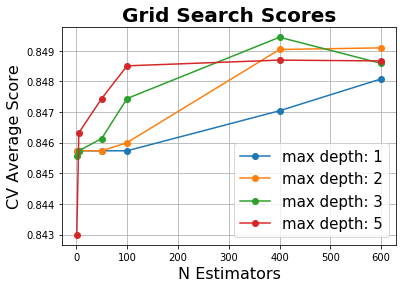

In [49]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
max_depth = gs.param_grid['classifier__max_depth']
n_estimators = gs.param_grid['classifier__n_estimators']
plot_grid_search(gs.cv_results_, n_estimators, max_depth, 'N Estimators', 'max depth')

In [0]:
gs.best_params_, gs.best_score_

In [0]:
#Heatmaps
sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_classifier__n_estimators', 'param_classifier__max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0], cmap = 'Blues')
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1], cmap = 'Blues')
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [0]:
y_pred = gs.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,  annot=True,  cmap = 'Blues', fmt = 'g', linewidths=.5);

**Improving the model further**

In [0]:
#https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101

param_grid = {
    'classifier__max_depth': [3],
    'classifier__n_estimators': [500]
}

gs2 = GridSearchCV(pipeline, param_grid, cv = 3, scoring = None, n_jobs = -1,\
                  verbose=False, return_train_score = True, refit = True)

fit_params={"classifier__early_stopping_rounds": 50, 
            "classifier__eval_metric" : ["error","auc"],
            "classifier__verbose_eval" = 10,
            "classifier__eval_set" : [[X_train, y_train],[X_test, y_test]]}
            
%time gs2.fit(X_train, y_train, **fit_params)
print(("best score from grid search: %.3f"
       % gs2.best_score_))

In [0]:
# retrieve performance metrics
results = gs2.best_estimator_.named_steps['classifier'].evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
# plot auc
ax[0].plot(x_axis, results['validation_0']['auc'], label='Train')
ax[0].plot(x_axis, results['validation_1']['auc'], label='Test')
ax[0].legend()
ax[0].set_title('XGBoost AUC-ROC')
ax[0].set_ylabel('AUC-ROC')
ax[0].set_xlabel('N estimators')
# plot classification error
ax[1].plot(x_axis, results['validation_0']['error'], label='Train')
ax[1].plot(x_axis, results['validation_1']['error'], label='Test')
ax[1].legend()
ax[1].set_title('XGBoost Classification Error')
ax[1].set_ylabel('Classification Error')
ax[1].set_xlabel('N estimators')
plt.show();
plt.tight_layout();

# TFIDF-W2V

### Set 2: categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)

### TFIDF W2V - preprocessed_essays

In [0]:
open("glove_vectors","rb")

In [0]:
preprocessed_essays = data['essay'].values

In [0]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays.append(vector)

print(len(tfidf_w2v_essays))
print(len(tfidf_w2v_essays[0]))

### TFIDF W2V - preprocessed_titles

In [0]:
preprocessed_titles = data['project_title'].values

In [0]:
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec for titles
# compute average word2vec for each title.
tfidf_w2v_titles = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles.append(vector)

print(len(tfidf_w2v_titles))
print(len(tfidf_w2v_titles[0]))

## Concatenating all features

In [0]:
tfidf_w2v_essays_dataframe = pd.DataFrame(tfidf_w2v_essays)
tfidf_w2v_titles_dataframe = pd.DataFrame(tfidf_w2v_titles)

In [0]:
tfidf_w2v_data = data.drop(['project_title',	'project_resource_summary', 'essay'], axis =1)

In [0]:
X = tfidf_w2v_data.drop('project_is_approved', axis =1)
y = tfidf_w2v_data[['project_is_approved']]

In [0]:
#Categorical encoding (response coding/ target coding)
categorical_features = ['school_state', 'teacher_prefix', 'project_grade_category','project_subject_categories','project_subject_subcategories']

In [0]:
rc = response_coding_transformer(categorical_features)
rc.fit(X, y)
X = rc.transform(X)

In [0]:
numeric_features = ['teacher_number_of_previously_posted_projects', 'price']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)]
    ,n_jobs=-1, verbose=True, remainder = 'passthrough'
            )

In [0]:
X_encoded_tfidfw2v = preprocessor.fit_transform(X)

In [0]:
X_encoded_tfidfw2v = load(X_encoded_tfidfw2v.joblib)
# dump(X_encoded_tfidfw2v, 'X_encoded_tfidfw2v.joblib')

In [0]:
%%time

X_tfidf_w2v_encoded = hstack((X_encoded_tfidfw2v ,tfidf_w2v_essays_dataframe ,tfidf_w2v_titles_dataframe)).tocsr()
print(X_tfidf_w2v_encoded.shape)#Now we have a full prediction pipeline.

In [0]:
%%time
seed = 42
y = data['project_is_approved'].values
X = X_tfidf_w2v_encoded

model = XGBClassifier(objective = 'binary:logistic',
                      random_state = seed, 
                      eval_metric = ["auc","error"],
                      verbosity = 1)
clf = Pipeline(steps=[('classifier',  model)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True)
clf.fit(X_train, y_train)

In [0]:
#model assessment
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test))
print('Classification Report:')
print(classification_report(y_test,pred_test))

In [0]:
%%time 
cv = KFold(3)
param_grid = {
    'classifier__max_depth': [2,3,5,7,9],
    'classifier__n_estimators': [1,2,5,10,50,100,300,600,900]
}

gs_tfidf = GridSearchCV(clf, param_grid, cv = cv, scoring = None, n_jobs = -1,\
                  verbose = 15 , return_train_score = True, refit = True)

gs_tfidf.fit(X_train, y_train)
print(("best classifier from grid search: %.3f"
       % gs_tfidf.score(X_test, y_test)))

In [0]:
dump(gs_tfidf, 'gs_tfidfw2v_9x5_50000.joblib')

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
# Utility function to report best scores
from time import time
start = time()
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean test score: {0:.8f} (std: {1:.8f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report(gs_tfidf.cv_results_)

In [0]:
#Heatmaps
sns.set()
max_scores1 = pd.DataFrame(gs_tfidf.cv_results_).groupby(['param_classifier__n_estimators', 'param_classifier__max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0], cmap = 'Blues')
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1], cmap = 'Blues')
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [0]:
y_pred = gs_tfidf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,  annot=True,  cmap = 'Blues', fmt = 'g', linewidths=.5);
plt.title('Confusion matrix for TFIDF W2V Test set')
plt.show()

## Summary

In [0]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Max depth","N estimatior", "AUC"]
x.add_row(["XGBoost TFIDF", 3, 800, 0.75])
x.add_row(["XGBoost TFIDF W2V", 3, 200, 0.72])
print(x)

In [0]:
!pip install catboost


In [0]:

from catboost import CatBoostClassifier
import timeit

def train_on_cpu():  
  model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.03
  )
  
  model.fit(
      X_train, y_train,
      eval_set=(X_test, y_test),
      verbose=10
  );   
      
cpu_time = timeit.timeit('train_on_cpu()', 
                         setup="from __main__ import train_on_cpu", 
                         number=1)

print('Time to fit model on CPU: {} sec'.format(int(cpu_time)))




In [0]:

def train_on_gpu():  
  model = CatBoostClassifier(
    iterations = 200,
    depth = 3,
    learning_rate=1,
    task_type='GPU',
    verbose=True,
    eval_metric='NormalizedGini',
  )
  
  model.fit(
      X_train, y_train,
      eval_set=(X_test, y_test),
      verbose=10,
      plot=True
  )     
      
gpu_time = timeit.timeit('train_on_gpu()', 
                         setup="from __main__ import train_on_gpu", 
                         number=1)

print('Time to fit model on GPU: {} sec'.format(int(gpu_time)))
print('GPU speedup over CPU: ' + '%.2f' % (cpu_time/gpu_time) + 'x')